In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [2]:
dataset = pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
y = dataset['target']
X = dataset.drop(['target'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

## Logistic Regression

In [16]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction1)
cm

array([[73, 29],
       [13, 90]], dtype=int64)

<AxesSubplot:>

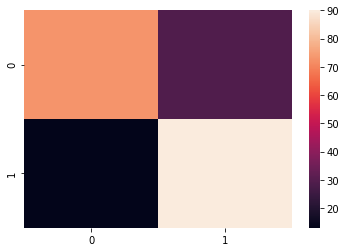

In [17]:
sns.heatmap(cm)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Confusion Matrix: ",confusion_matrix(y_test, prediction1)) 
print ("Accuracy : ",accuracy_score(y_test,prediction1)*100)
print("Report : ",classification_report(y_test, prediction1))

Confusion Matrix:  [[73 29]
 [13 90]]
Accuracy :  79.51219512195122
Report :                precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## Decision Tree 

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

Confusion Matrix:  [[86 16]
 [ 4 99]]
Accuracy :  90.2439024390244
Report :                precision    recall  f1-score   support

           0       0.96      0.84      0.90       102
           1       0.86      0.96      0.91       103

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205



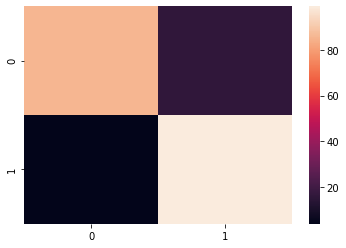

In [22]:
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
m=tree_model.fit(X, y)
prediction2=m.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)
sns.heatmap(cm2)
print("Confusion Matrix: ",confusion_matrix(y_test, prediction2)) 
print ("Accuracy : ",accuracy_score(y_test,prediction2)*100)
print("Report : ",classification_report(y_test, prediction2))

Confusion Matrix:  [[ 99   3]
 [  3 100]]
Accuracy :  97.07317073170731
Report :                precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.97      0.97      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



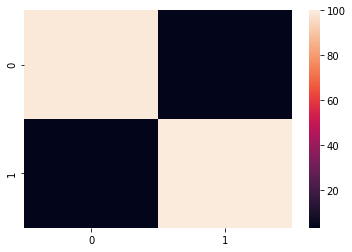

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3)
print("Confusion Matrix: ",confusion_matrix(y_test, prediction3)) 
print ("Accuracy : ",accuracy_score(y_test,prediction3)*100)
print("Report : ",classification_report(y_test, prediction3))

In [28]:
input =(12,0,125,212,0,1,200,0,1.0,2,2,3,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(
